In [1]:
import pandas as pd 
import numpy as np

In [68]:
dt=pd.read_csv("spam.csv")

In [69]:
dt

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [70]:
# we have 3 columns where label is o/p and other 2 are i/p
dt.shape

(2893, 3)

In [71]:
dt.label.value_counts()
#from this we can say that our data isnt balanced 
# its okay  

0    2412
1     481
Name: label, dtype: int64

In [72]:
# finding the ratio of the label
print(round(len(dt[dt['label']==0])/ len(dt.label),2)*100)
print(round(len(dt[dt['label']==1])/ len(dt.label),2)*100)


83.0
17.0


In [73]:
dt['Length_message']=dt.message.str.len()
dt['Length_subject ']=dt.subject.str.len()



In [74]:
# converting the data to lower case 
dt['message']=dt['message'].str.lower()
dt['subject']=dt['subject'].str.lower()

In [75]:
dt

,subject,message,label,Length_message,Length_subject
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856,39.0
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800,NaN
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435,50.0
3,risk,a colleague and i are researching the differin...,0,324,4.0
4,request book information,earlier this morning i was on the phone with a...,0,1046,24.0
...,...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1,262,28.0
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1,2163,34.0
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0,1039,34.0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0,2949,54.0


In [83]:
# regularization
# for email adress
dt['message']=dt['message'].str.replace(r'^.+@[^.].*\.[a-z]{2,}$','emailaddress')
#for url with web adress
dt['message']=dt['message'].str.replace(r'http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# replae money symbols  with money dollars
dt['message']=dt['message'].str.replace(r'£|\$','dollers')
# replace 10 digit with phone nummber
dt['message']=dt['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber' )
# reaplce numbers with number
dt['message']=dt['message'].str.replace(r'\d+(\.\d+)?', 'numbr')
dt['subject']=dt['subject'].str.replace(r'^.+@[^.].*\.[a-z]{2,}$','emailaddress')
#for url with web adress
dt['subject']=dt['subject'].str.replace(r'http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
# replae money symbols  with money dollars
dt['subject']=dt['subject'].str.replace(r'£|\$','dollers')
# replace 10 digit with phone nummber
dt['subject']=dt['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber' )
# replace numbers with number
dt['subject']=dt['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [98]:
dt

,subject,message,label,Length_message,Length_subject
0,job posting appleiss research center,content length numbr appleiss research center ...,0,2856,39.0
1,empty,lang classification grimes joseph e and barbar...,0,1800,NaN
2,query letter frequencies for text identification,i am posting this inquiry for sergei atamas sa...,0,1435,50.0
3,risk,a colleague and i are researching the differin...,0,324,4.0
4,request book information,earlier this morning i was on the phone with a...,0,1046,24.0
...,...,...,...,...,...
2888,love your profile ysuolvpv,hello thanks for stopping by we have taken man...,1,262,28.0
2889,you have been asked to join kiddin,the list owner of kiddin has invited you to jo...,1,2163,34.0
2890,anglicization of composers names,judging from the return post i must have sound...,0,1039,34.0
2891,re numbr numbr comparative method n ary compar...,gotcha there are two separate fallacies in the...,0,2949,54.0


In [97]:
# remove puntuation
dt['message']=dt['message'].str.replace(r'[^\w\d\s]','')
dt['subject']=dt['subject'].str.replace(r'[^\w\d\s]','')
# remove whitespace b/w terms with a single space
dt['message']=dt['message'].str.replace(r'\s+',' ')
dt['subject']=dt['subject'].str.replace(r'\s+',' ')
# remove leading and trailing white space
dt['message']=dt['message'].str.replace(r'^\s+|\s+?$','')
dt['subject']=dt['subject'].str.replace(r'^\s+|\s+?$','')

In [93]:
dt['subject']=dt['subject'].replace(np.NaN,'empty')

In [104]:
dt.head()
# free from regularlztion expressions

,subject,message,label,Length_message,Length_subject
0,job posting appleiss research center,content length numbr appleiss research center ...,0,2856,39.0
1,empty,lang classification grimes joseph e barbara f ...,0,1800,NaN
2,query letter frequencies text identification,posting inquiry sergei atamas satamas umabnet ...,0,1435,50.0
3,risk,colleague researching differing degrees risk p...,0,324,4.0
4,request book information,earlier morning phone friend mine living south...,0,1046,24.0


In [100]:
# remove stop words 
import string
import nltk
from nltk.corpus import stopwords

In [101]:
stop_words=set(stopwords.words('english')+['u','u','ur','4','2','im','dont','doin','ure'])
dt['message']=dt['message'].apply(lambda x: ' '.join(
 term for term in x.split() if term not in stop_words))

In [103]:
stop_words=set(stopwords.words('english')+['u','u','ur','4','2','im','dont','doin','ure'])
dt['subject']=dt['subject'].apply(lambda y: ' '.join(
 term for term in y.split() if term not in stop_words))

In [105]:
# new column after puntucation 
dt['clean_length_message']=dt.message.str.len()
dt['clean_length_suject']=dt.subject.str.len()


In [132]:
dt

,subject,message,label,Length_message,Length_subject,clean_length_message,clean_length_suject
0,job posting appleiss research center,content length numbr appleiss research center ...,0,2856,39.0,2182,36
1,empty,lang classification grimes joseph e barbara f ...,0,1800,NaN,1455,5
2,query letter frequencies text identification,posting inquiry sergei atamas satamas umabnet ...,0,1435,50.0,1056,44
3,risk,colleague researching differing degrees risk p...,0,324,4.0,210,4
4,request book information,earlier morning phone friend mine living south...,0,1046,24.0,629,24
...,...,...,...,...,...,...,...
2888,love profile ysuolvpv,hello thanks stopping taken many new pics made...,1,262,28.0,132,21
2889,asked join kiddin,list owner kiddin invited join mailing list li...,1,2163,34.0,1215,17
2890,anglicization composers names,judging return post must sounded like kind sel...,0,1039,34.0,644,29
2891,numbr numbr comparative method n ary comparison,gotcha two separate fallacies argument nary co...,0,2949,54.0,1870,47


In [146]:
print("originial message length is ",dt['Length_message'].sum())
print("cleaned message length is ",dt['clean_length_message'].sum())
print("Orginial subject is  ",dt['Length_subject '].sum())
print("cleaned suject is",dt['clean_length_suject'].sum())


originial message length is  9344743
cleaned message length is  6759839
Orginial subject is   91663.0
cleaned suject is 78602


In [145]:
dt['Length_subject ']=dt['Length_subject '].replace(np.NaN,0)

In [142]:
dt.columns

Index(['subject', 'message', 'label', 'Length_message', 'Length_subject ',
       'clean_length_message', 'clean_length_suject'],
      dtype='object')

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

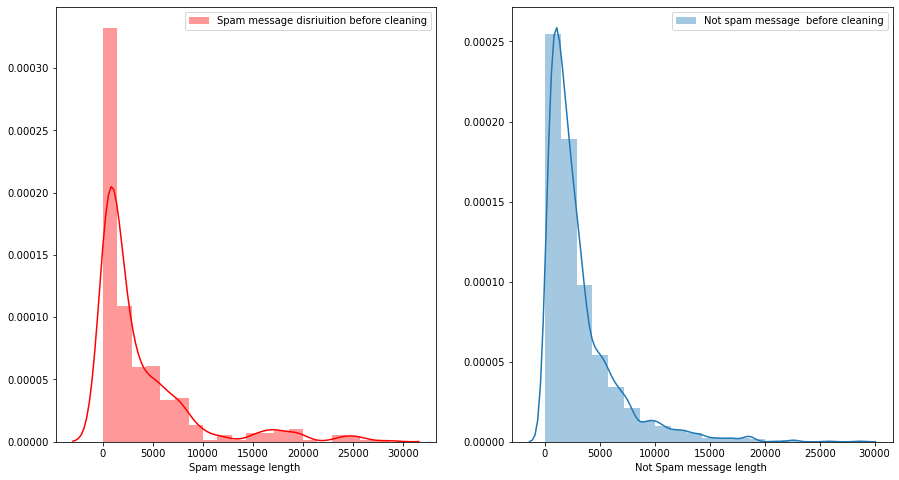

In [153]:
# message ditribution before cleaning 
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(dt[dt['label']==1]['Length_message'],bins=20,ax=ax[0],label='Spam message disriuition before cleaning',color='red')
ax[0].set_xlabel("Spam message length ")
ax[0].legend()
sns.distplot(dt[dt['label']==0]['Length_message'],bins=20,ax=ax[1],label='Not spam message  before cleaning')
ax[1].set_xlabel("Not Spam message length ")
ax[1].legend()
plt.show()

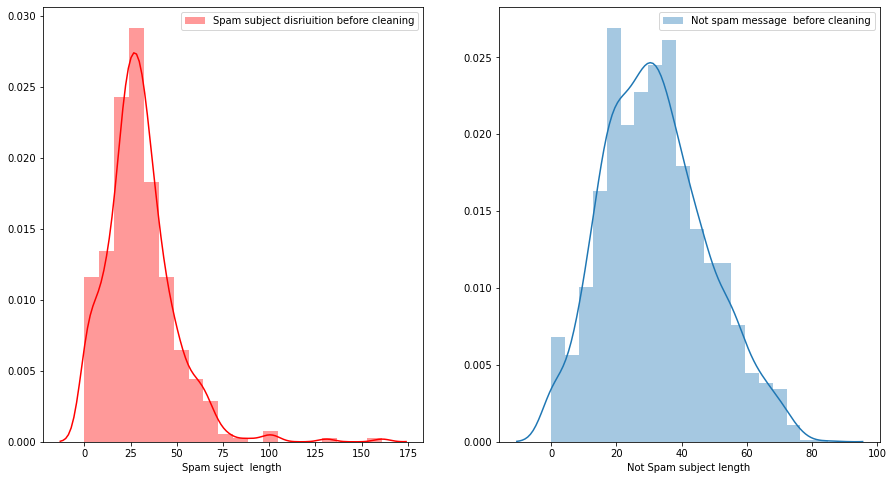

In [154]:
# suject distribuion before cleaning 
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(dt[dt['label']==1]['Length_subject '],bins=20,ax=ax[0],label='Spam subject disriuition before cleaning',color='red')
ax[0].set_xlabel("Spam suject  length ")
ax[0].legend()
sns.distplot(dt[dt['label']==0]['Length_subject '],bins=20,ax=ax[1],label='Not spam message  before cleaning')
ax[1].set_xlabel("Not Spam subject length ")
ax[1].legend()
plt.show()

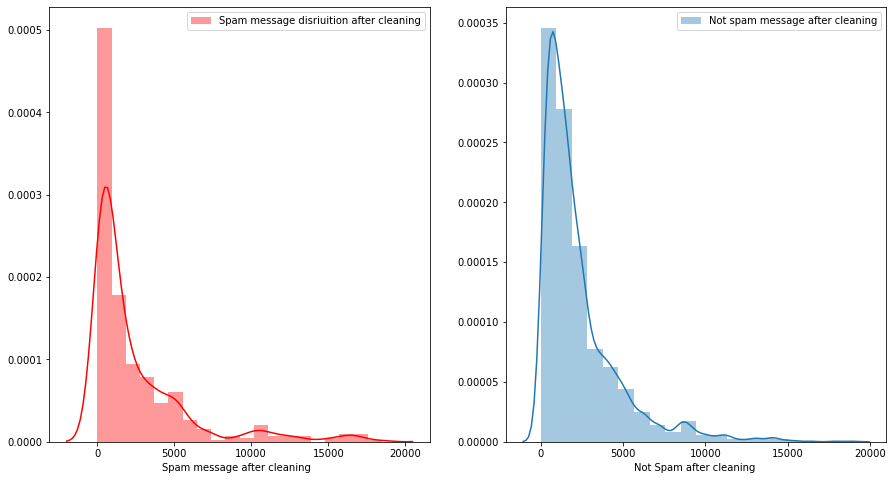

In [155]:
# message ditribution after  cleaning 
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(dt[dt['label']==1]['clean_length_message'],bins=20,ax=ax[0],label='Spam message disriuition after cleaning',color='red')
ax[0].set_xlabel("Spam message after cleaning  ")
ax[0].legend()
sns.distplot(dt[dt['label']==0]['clean_length_message'],bins=20,ax=ax[1],label='Not spam message after cleaning')
ax[1].set_xlabel("Not Spam after cleaning ")
ax[1].legend()
plt.show()

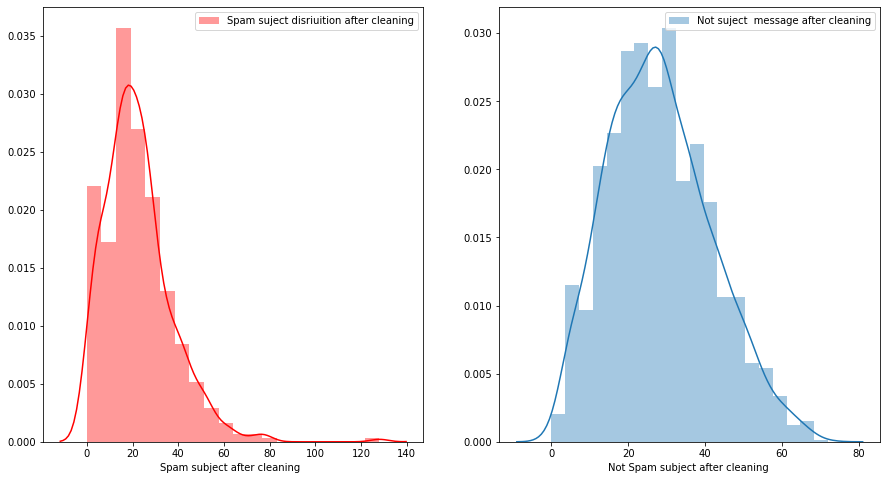

In [156]:
#suject after cleaning 
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(dt[dt['label']==1]['clean_length_suject'],bins=20,ax=ax[0],label='Spam suject disriuition after cleaning',color='red')
ax[0].set_xlabel("Spam subject after cleaning  ")
ax[0].legend()
sns.distplot(dt[dt['label']==0]['clean_length_suject'],bins=20,ax=ax[1],label='Not suject  message after cleaning')
ax[1].set_xlabel("Not Spam subject after cleaning ")
ax[1].legend()
plt.show()

In [161]:
dt.columns

Index(['subject', 'message', 'label', 'Length_message', 'Length_subject ',
       'clean_length_message', 'clean_length_suject'],
      dtype='object')

In [160]:
from wordcloud import WordCloud

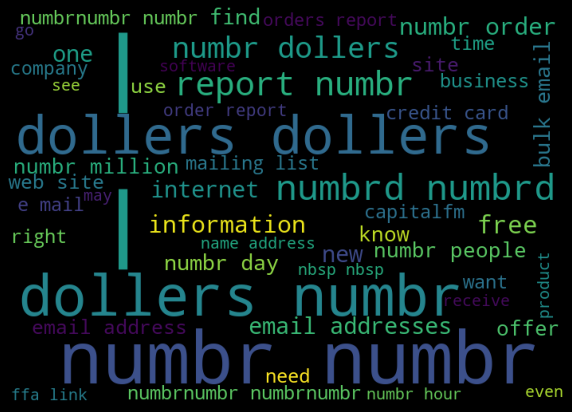

In [162]:
# word cloud for message 
spam_message=dt['message'][dt['label']==1]
message_cloud=WordCloud(width=700,height=500,max_words=50).generate(' '.join(spam_message))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(message_cloud)
plt.axis('off')
plt.show()

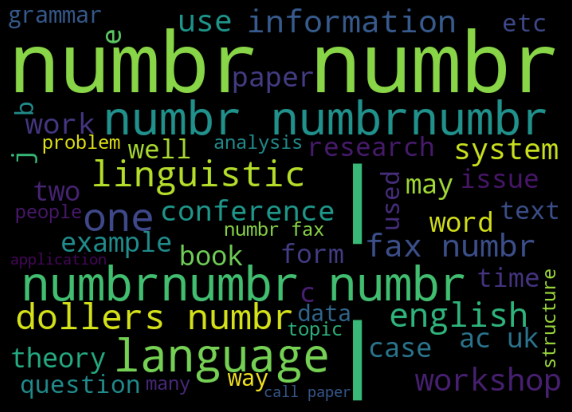

In [163]:
#messag not spam
n_spam_message=dt['message'][dt['label']==0]
message_cloud=WordCloud(width=700,height=500,max_words=50).generate(' '.join(n_spam_message))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(message_cloud)
plt.axis('off')
plt.show()

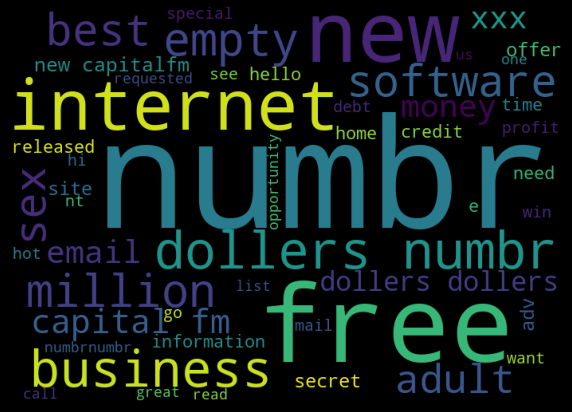

In [165]:
# word cloud for suject 
spam_subject =dt['subject'][dt['label']==1]
subject_cloud=WordCloud(width=700,height=500,max_words=50).generate(' '.join(spam_subject))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(subject_cloud)
plt.axis('off')
plt.show()

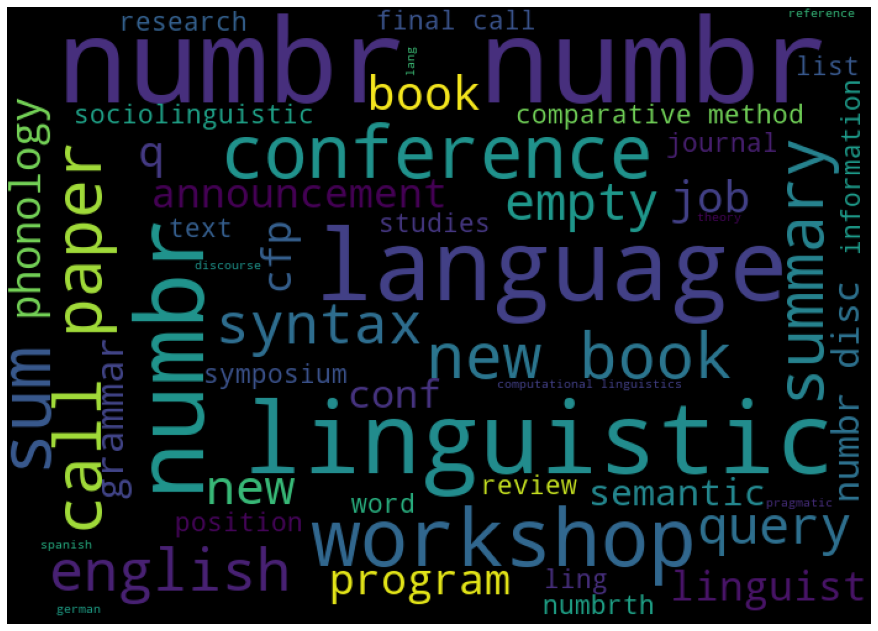

In [169]:
# word cloud not spam 
n_spam_subject =dt['subject'][dt['label']==0]
subject_cloud=WordCloud(width=700,height=500,max_words=50).generate(' '.join(n_spam_subject))
plt.figure(figsize=(12,9))
plt.imshow(subject_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [187]:
# covrt text to vectors 
# using navies bayes casue it depends on probability of events occuring and it is suited for text format 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [188]:
dt.head()

,subject,message,label,Length_message,Length_subject,clean_length_message,clean_length_suject
0,job posting appleiss research center,content length numbr appleiss research center ...,0,2856,39.0,2182,36
1,empty,lang classification grimes joseph e barbara f ...,0,1800,0.0,1455,5
2,query letter frequencies text identification,posting inquiry sergei atamas satamas umabnet ...,0,1435,50.0,1056,44
3,risk,colleague researching differing degrees risk p...,0,324,4.0,210,4
4,request book information,earlier morning phone friend mine living south...,0,1046,24.0,629,24


In [190]:
t_vec=TfidfVectorizer()
nav=MultinomialNB()
features=t_vec.fit_transform(dt['subject'],dt['message'])

In [194]:
x=features
y=dt['label']

In [196]:
x.shape

(2893, 3045)

In [197]:
y.shape

(2893,)

In [198]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11)

In [199]:
nav.fit(x_train,y_train)

MultinomialNB()

In [200]:
y_pred=nav.predict(x_test)

In [201]:
print(" Accuracy score is ",accuracy_score(y_test,y_pred))
print("Classification report is ",classification_report(y_test,y_pred))


 Accuracy score is  0.919889502762431
Classification report is                precision    recall  f1-score   support

           0       0.91      1.00      0.95       615
           1       1.00      0.47      0.64       109

    accuracy                           0.92       724
   macro avg       0.96      0.73      0.80       724
weighted avg       0.93      0.92      0.91       724



In [202]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [205]:
#plotting confusion matrix 
cf_mt=confusion_matrix(y_test,y_pred)

Text(0.5, 1.0, 'confusion matix')

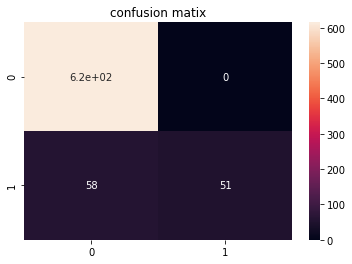

In [206]:
a=plt.subplot()
sns.heatmap(cf_mt,annot=True)
a.set_title('confusion matix')

In [207]:
cf_mt
# there is no type one error for 0 not spam 
#  there are 58 type 2 errors for 1 sapm 

array([[615,   0],
       [ 58,  51]], dtype=int64)